<a href="https://colab.research.google.com/github/Nichiel/rubbish_classifier/blob/main/rasp_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.1.0
!pip install tensorflow_hub

In [ ]:
!pip install h5py==2.10.0 --force-reinstall

In [18]:
import tensorflow 
tensorflow.__version__

'2.1.0'

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


BATCH_SIZE = 1
IMG_SIZE = (224, 224)
directory = 'drive/MyDrive/TEST'
model_directory = 'drive/MyDrive/rubbish_classifier_model_A_0001.h5'
folder_name = ['P','TP']

def PhotoImport(folder_name):
  file_list = []
  for index in folder_name:
    imgdir_path = pathlib.Path(directory, index )
    last_list = sorted([str(path) for path in imgdir_path.glob('*.jpeg')]) 
    file_list += last_list
    last_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')]) 
    file_list += last_list
  return file_list

file_list = PhotoImport(folder_name)
print(file_list)

label = labels = [1 if 'TP' in file else 0
          for file in file_list]

print(label)

test_dataset = tf.data.Dataset.from_tensor_slices((file_list,label))

def format_image(path,label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image,size=IMG_SIZE)/255.0
    return image, tf.cast(label,tf.int32)

test_batches = test_dataset.map(format_image).batch(BATCH_SIZE)

model = tf.keras.models.load_model(model_directory)
loss, accuracy = model.evaluate(test_batches.take(200))




In [21]:
print('Test Acc: {:.2f}%'.format(accuracy*100))

Test Acc: 97.50%


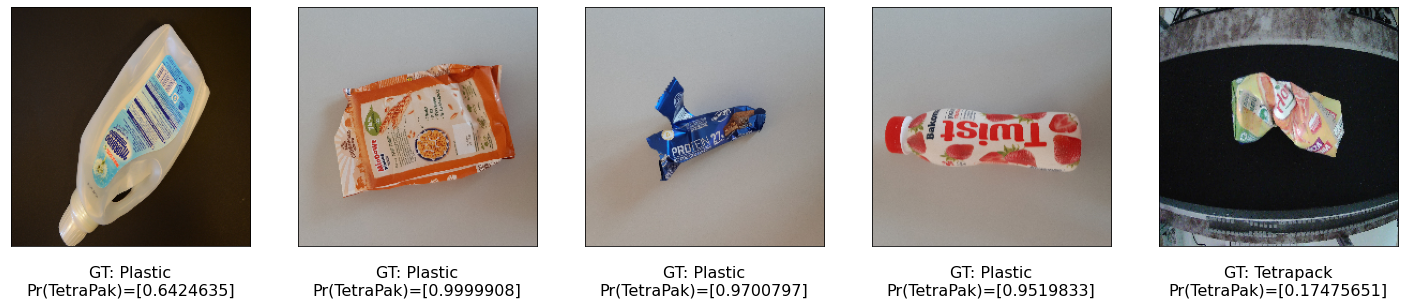

In [20]:
ds = test_batches.unbatch()
pred_logits = model.predict(ds.batch(3))
fig = plt.figure(figsize=(30, 90))
sub_nr = 1

for j,example in enumerate(ds):
  if((example[1].numpy() == 1 and pred_logits[j] <0.5 ) or (example[1].numpy() == 0 and pred_logits[j] >0.5)):
    ax = fig.add_subplot(15, 6, sub_nr)
    ax.set_xticks([]); 
    ax.set_yticks([])
    ax.imshow(example[0])
    if example[1].numpy() == 1:
        label = 'Tetrapack'
    else:
        label = 'Plastic'
    ax.text(
        0.5, -0.15, 
        f'GT: {label}\nPr(TetraPak)={pred_logits[j]}', 
        size=16, 
        horizontalalignment='center',
        verticalalignment='center', 
        transform=ax.transAxes)
    sub_nr+=1
plt.show()